In [29]:
%pip install dataprep

  Using cached dataprep-0.4.1-py3-none-any.whl.metadata (14 kB)
  Using cached bokeh-2.4.3-py3-none-any.whl.metadata (14 kB)
  Using cached dask-2.30.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached Flask-1.1.4-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl.metadata (5.4 kB)
  Using cached Jinja2-2.11.3-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached jsonpath_ng-1.7.0-py3-none-any.whl.metadata (18 kB)
  Using cached levenshtein-0.12.0.tar.gz (54 kB)
  Preparing metadata (setup.py) ... done
  Using cached Metaphone-0.6-py3-none-any.whl
  Using cached pandas-1.5.3-cp312-cp312-macosx_11_0_arm64.whl
  Using cached pydantic-1.10.21-cp312-cp312-macosx_11_0_arm64.whl.metadata (153 kB)
  Using cached python_stdnum-1.20-py2.py3-none-any.whl.metadata (18 kB)
  Using cached regex-2020.11.13-cp312-cp312-macosx_11_0_arm64.whl
  Using cached usaddress-0.5.11-py3-none-any.whl.metadata (6.9 kB)
  Using cached varname-0.8.3-py3-none-any.whl.metadat

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [6]:
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [8]:
df.shape

(1014, 7)

In [9]:
#Miss Valuse
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [10]:
#Duplicated value 
data_dup = df.duplicated().any()
data_dup

True

In [11]:
df = df.drop_duplicates()

In [12]:
data_dup = df.duplicated().any()
data_dup

False

In [13]:
ca_val=[]
co_val=[]

for column in df.columns:
    if df[column].nunique() <=10:
        ca_val.append(column)
    else:
        co_val.append(column)

In [14]:
#Categorical Data
ca_val

['BodyTemp', 'RiskLevel']

In [15]:
df['BodyTemp'].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [16]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [17]:
co_val

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']

In [18]:
df['Age'].unique()

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46])

In [19]:
df['SystolicBP'].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78])

In [20]:
df['DiastolicBP'].unique()

array([ 80,  90,  70,  85,  60,  89,  75, 100,  50,  65,  95,  49,  63,
        69,  76,  68])

In [21]:
df['BS'].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ,  6.6 ,
        6.5 ,  7.6 ])

In [22]:
df['HeartRate'].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68,  7])

In [23]:
RiskLevel = {'low risk':1, 
        'mid risk':2, 
        'high risk':3}

# apply using map
df['RiskLevel'] = df['RiskLevel'].map(RiskLevel).astype(float)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,2.0
674,15,100,60,6.0,98.0,80,1.0
703,15,100,49,7.6,98.0,77,1.0
704,12,100,50,6.0,98.0,70,2.0


In [24]:
df['RiskLevel'].value_counts()

RiskLevel
1.0    234
3.0    112
2.0    106
Name: count, dtype: int64

In [25]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115,1.730088
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973,0.833169
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,1.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000,1.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,3.000000


In [26]:
df[['RiskLevel','Age']].corr()

,RiskLevel,Age
RiskLevel,1.00000,0.18301
Age,0.18301,1.00000


In [ ]:
df[['RiskLevel','SystolicBP']].corr()

In [48]:
df[['RiskLevel','DiastolicBP']].corr()

,RiskLevel,DiastolicBP
RiskLevel,1.000000,0.254239
DiastolicBP,0.254239,1.000000


In [47]:
df[['RiskLevel','BS']].corr()

,RiskLevel,BS
RiskLevel,1.000000,0.548888
BS,0.548888,1.000000


In [46]:
df[['RiskLevel','HeartRate']].corr()

,RiskLevel,HeartRate
RiskLevel,1.000000,0.183289
HeartRate,0.183289,1.000000


In [45]:
df


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,2.0
674,15,100,60,6.0,98.0,80,1.0
703,15,100,49,7.6,98.0,77,1.0
704,12,100,50,6.0,98.0,70,2.0


In [ ]:
from dataprep.eda import plot_correlation
plot_correlation(df)

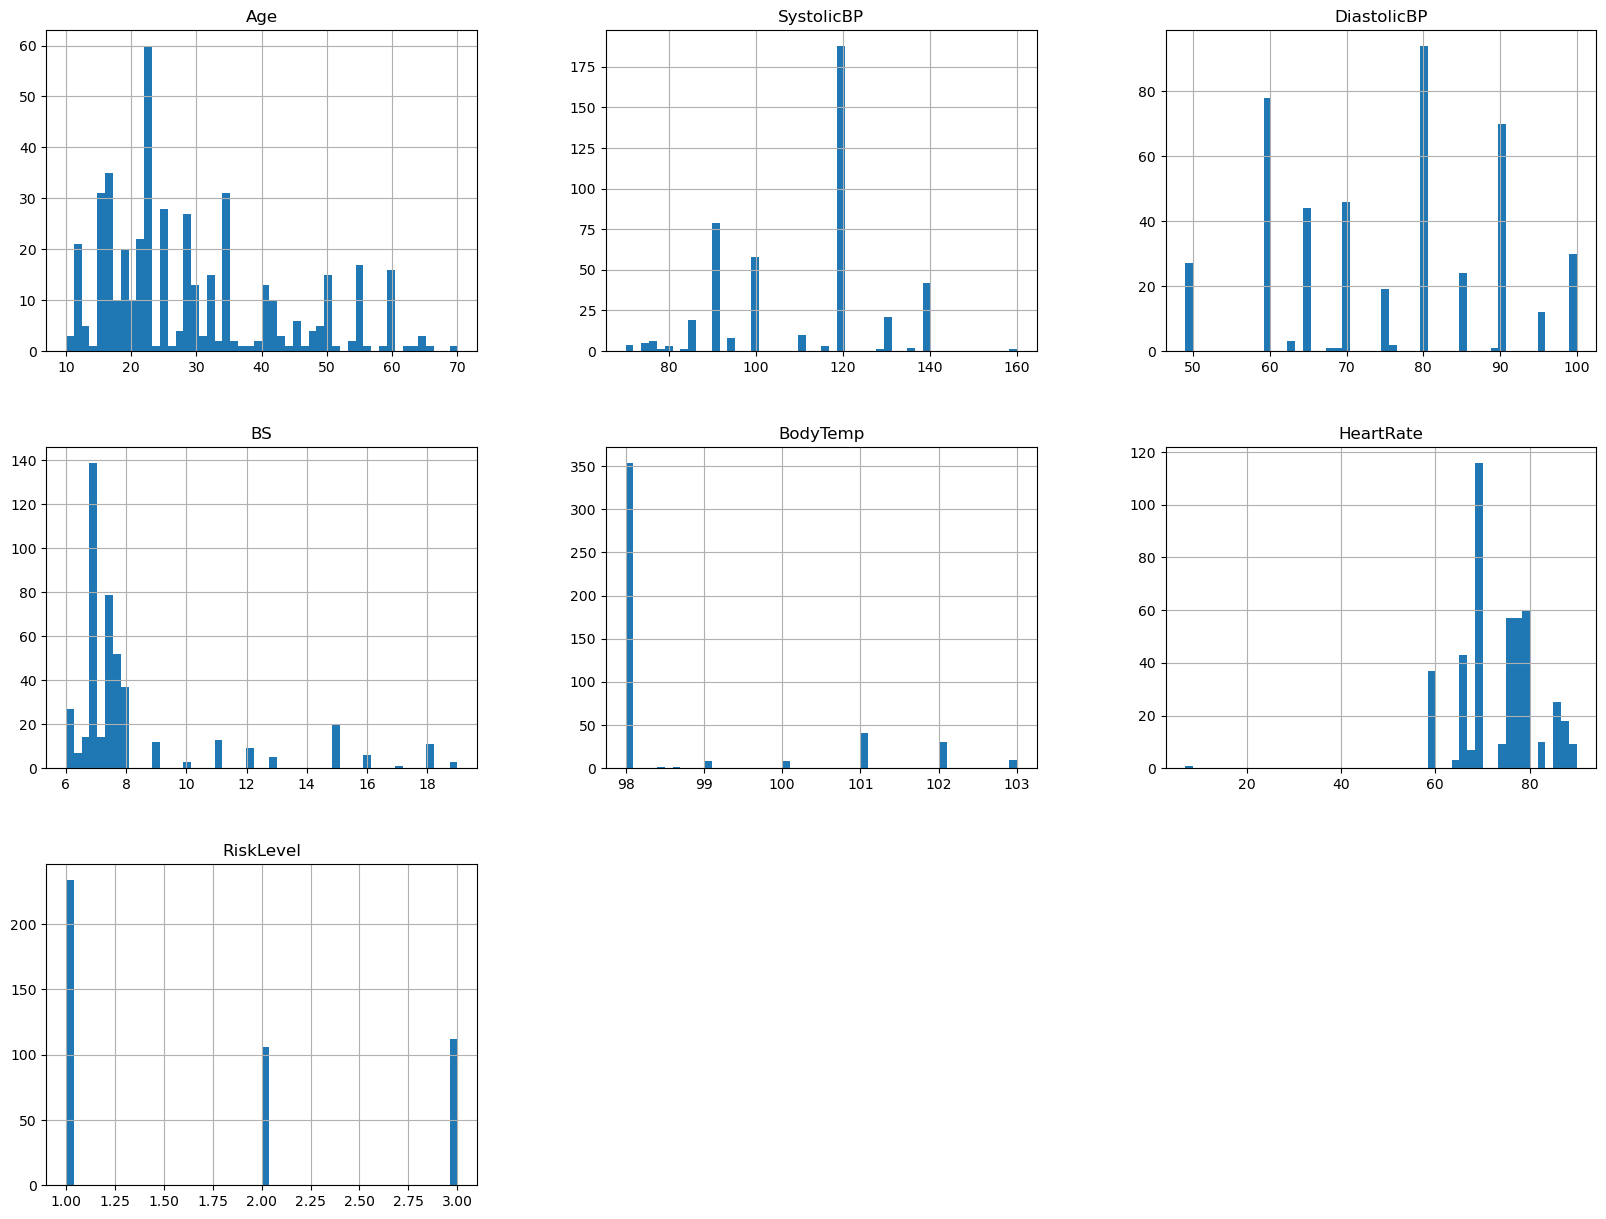

In [31]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

/var/folders/05/g8bdsp_n7mv1f18ybb6ybs640000gn/T/ipykernel_73875/3597148143.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RiskLevel', data=df, palette='viridis')


<Axes: xlabel='RiskLevel', ylabel='count'>

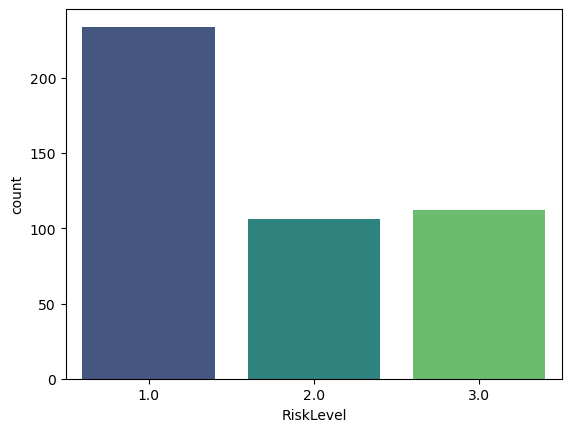

In [32]:
df['RiskLevel'].value_counts()

df['RiskLevel'].value_counts() * 100 / len(df)


sns.countplot(x='RiskLevel', data=df, palette='viridis')

In [33]:
X = df.drop('RiskLevel',axis=1)
y = df['RiskLevel']

In [34]:
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70
674,15,100,60,6.0,98.0,80
703,15,100,49,7.6,98.0,77
704,12,100,50,6.0,98.0,70


In [35]:
y

0      3.0
1      3.0
2      3.0
3      3.0
4      1.0
      ... 
673    2.0
674    1.0
703    1.0
704    2.0
705    1.0
Name: RiskLevel, Length: 452, dtype: float64

In [36]:
#Splitting The Dataset

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
                                               random_state=42)
y_test

425    3.0
39     1.0
492    2.0
484    1.0
192    3.0
      ... 
29     1.0
171    3.0
377    1.0
26     1.0
7      3.0
Name: RiskLevel, Length: 136, dtype: float64

In [37]:
print(f'Training Shape x:',X_train.shape)
print(f'Testing Shape x:',X_test.shape)
print('*****___________*****___________*****')
print(f'Training Shape y:',X.shape)
print(f'Testing Shape y:',y.shape)

Training Shape x: (316, 6)
Testing Shape x: (136, 6)
*****___________*****___________*****
Training Shape y: (452, 6)
Testing Shape y: (452,)


In [38]:
#StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_test= ss.transform(X_test)


In [39]:
#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)
print("Train accuracy:",svm.score(X_train,y_train))
print("Test accuracy:",svm.score(X_test,y_test))

y_pred = svm.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, svm.predict(X_test)))

Train accuracy: 0.7246835443037974
Test accuracy: 0.6544117647058824
[3. 1. 1. 1. 3. 1. 3. 1. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3.
 3. 1. 1. 1. 3. 1. 1. 3. 1. 3. 1. 1. 1. 1. 3. 1. 1. 2. 1. 1. 1. 3. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 3. 1. 1. 1. 1. 1. 1. 3. 2.
 1. 1. 3. 1. 1. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 1. 1.
 1. 1. 3. 3. 1. 3. 1. 1. 3. 3. 1. 1. 3. 1. 1. 1. 1. 3. 1. 1. 3. 3. 1. 2.
 1. 2. 1. 1. 1. 1. 3. 1. 3. 1. 1. 1. 3. 1. 1. 3.]
CM: [[62  2  1]
 [30  2  7]
 [ 6  1 25]]
Accuracy: 65.44117647058823 %
              precision    recall  f1-score   support

         1.0       0.63      0.95      0.76        65
         2.0       0.40      0.05      0.09        39
         3.0       0.76      0.78      0.77        32

    accuracy                           0.65       136
   macro avg       0.60      0.60      0.54       136
weighted avg       0.60      0.65      0.57       136



In [41]:
#Applying Decision Tree
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X_train, y_train)

print("Train accuracy:",decision_tree.score(X_train,y_train))
print("Test accuracy:",decision_tree.score(X_test,y_test))

y_pred = decision_tree.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, decision_tree.predict(X_test)))

Train accuracy: 0.9430379746835443
Test accuracy: 0.625
[3. 1. 2. 2. 2. 1. 3. 3. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 3.
 3. 1. 3. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 2. 3. 2. 3.
 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 3. 2. 1. 1. 1. 1. 1. 1. 2. 3. 3.
 1. 2. 3. 1. 1. 1. 2. 3. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 3. 3. 1. 2.
 1. 1. 3. 1. 2. 2. 2. 1. 2. 3. 2. 1. 3. 2. 3. 1. 2. 1. 1. 1. 3. 3. 1. 2.
 3. 2. 1. 1. 2. 1. 3. 1. 3. 2. 3. 1. 2. 1. 1. 3.]
CM: [[50 12  3]
 [19 15  5]
 [ 1 11 20]]
Accuracy: 62.5 %
              precision    recall  f1-score   support

         1.0       0.71      0.77      0.74        65
         2.0       0.39      0.38      0.39        39
         3.0       0.71      0.62      0.67        32

    accuracy                           0.62       136
   macro avg       0.61      0.59      0.60       136
weighted avg       0.62      0.62      0.62       136



In [42]:
#Applying RandomForest
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X_train, y_train)

print("Train accuracy:",random_forest.score(X_train,y_train))
print("Test accuracy:",random_forest.score(X_test,y_test))

y_pred = random_forest.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, random_forest.predict(X_test)))

Train accuracy: 0.9430379746835443
Test accuracy: 0.6544117647058824
[3. 1. 2. 2. 2. 1. 3. 3. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 3.
 3. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 1. 1. 2. 1. 2. 1. 3. 2. 3.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 2. 1. 1. 1. 1. 1. 2. 3. 3.
 1. 2. 3. 1. 1. 1. 1. 3. 3. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 3. 3. 2. 2.
 2. 1. 3. 1. 2. 3. 2. 1. 3. 1. 2. 1. 3. 2. 3. 1. 3. 3. 1. 1. 3. 3. 1. 2.
 3. 2. 1. 1. 1. 1. 3. 1. 3. 1. 1. 1. 3. 1. 1. 3.]
CM: [[53 10  2]
 [23 11  5]
 [ 4  3 25]]
Accuracy: 65.44117647058823 %
              precision    recall  f1-score   support

         1.0       0.66      0.82      0.73        65
         2.0       0.46      0.28      0.35        39
         3.0       0.78      0.78      0.78        32

    accuracy                           0.65       136
   macro avg       0.63      0.63      0.62       136
weighted avg       0.63      0.65      0.63       136



In [43]:
#Applying GaussianNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train , y_train)

print("Train accuracy:",nb.score(X_train,y_train))
print("Test accuracy:",nb.score(X_test,y_test))

y_pred = nb.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, nb.predict(X_test)))

Train accuracy: 0.6708860759493671
Test accuracy: 0.6323529411764706
[3. 1. 1. 1. 1. 1. 3. 1. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3.
 2. 1. 1. 1. 3. 1. 1. 3. 1. 3. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 3. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 2. 1. 1. 1. 1. 1. 1. 3. 1.
 1. 1. 3. 1. 1. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1.
 1. 1. 3. 2. 1. 3. 1. 1. 3. 1. 1. 1. 3. 1. 1. 1. 2. 2. 1. 1. 3. 3. 1. 1.
 1. 1. 1. 1. 1. 1. 3. 1. 3. 1. 1. 1. 1. 1. 1. 3.]
CM: [[63  0  2]
 [32  3  4]
 [10  2 20]]
Accuracy: 63.23529411764706 %
              precision    recall  f1-score   support

         1.0       0.60      0.97      0.74        65
         2.0       0.60      0.08      0.14        39
         3.0       0.77      0.62      0.69        32

    accuracy                           0.63       136
   macro avg       0.66      0.56      0.52       136
weighted avg       0.64      0.63      0.56       136



In [49]:
import joblib
joblib.dump(random_forest,"maternal.pkl")

['maternal.pkl']